In [3]:
# One-Way ANOVA tests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scikit_posthocs as sp
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns

In [46]:
df = pd.read_csv(r"C:\Users\sulei\Documents\Vimentin_intensity_data.csv")

In [47]:
df=(df.groupby('label', as_index=False).mean()).T

In [48]:
#Set First Row as Header
df.columns = df.iloc[0]
df = df[1:]

In [49]:
groups = list(df.columns)

In [50]:
# Etract individual groups
vehicle = df[" vehicle"]
_12h_PT = df["12h PT"]
_24h    = df["24h"]
_48h    = df["48h"]

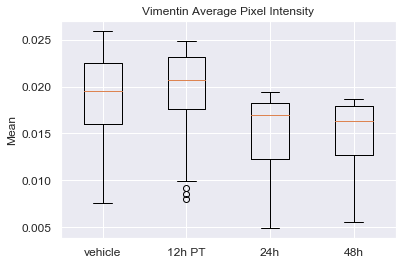

In [51]:
#visually examine a box and whisker plot
fig, ax = plt.subplots(1, 1)
ax.boxplot([vehicle, _12h_PT, _24h, _48h])
ax.set_xticklabels(["vehicle", "12h PT", "24h", "48h"]) 
ax.set_ylabel("Mean")
ax.set_title('Vimentin Average Pixel Intensity')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [52]:
# Perform the ANOVA
anova_result = stats.f_oneway(vehicle, _12h_PT, _24h, _48h)

print('Anova Result: ', anova_result)


Anova Result:  F_onewayResult(statistic=13.661526467003611, pvalue=4.088559630911374e-08)


In [53]:
# Get all label pairs
label_pairs = []

for label_1 in range(1):
    for label_2  in range(label_1+1, 4):
        label_pairs.append((groups[label_1], groups[label_2]))

In [54]:
# Conduct t-test on vehicle with each pair
for label_1, label_2 in label_pairs: 
    print(label_1, label_2)
    print(stats.ttest_ind(df[label_1], df[label_2]))

 vehicle 12h PT
Ttest_indResult(statistic=-1.0430796353340677, pvalue=0.29953101824243333)
 vehicle 24h
Ttest_indResult(statistic=3.555658896566171, pvalue=0.000587327953236906)
 vehicle 48h
Ttest_indResult(statistic=3.932263108432144, pvalue=0.00015893693188076308)


In [55]:
# Create the data and perform Dunn’s test
data = [vehicle, _12h_PT, _24h, _48h]
dunn_test = sp.posthoc_dunn(data, p_adjust = 'sidak')
df = pd.DataFrame(dunn_test)
print('Dunns Test:\n', df)

Dunns Test:
           1         2         3         4
1  1.000000  0.739878  0.003322  0.000502
2  0.739878  1.000000  0.000013  0.000001
3  0.003322  0.000013  1.000000  0.997461
4  0.000502  0.000001  0.997461  1.000000


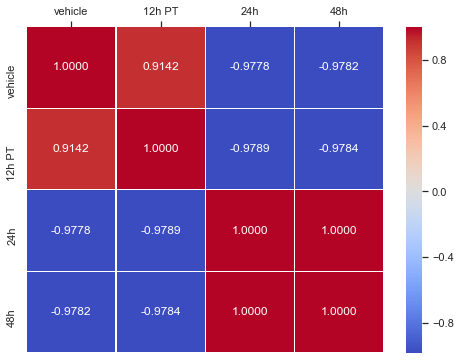

In [56]:
# Plot as heatmap
corr = df.corr()
x_axis_labels = ["vehicle", "12h PT", "24h", "48h"]
y_axis_labels = ["vehicle", "12h PT", "24h", "48h"]
plt.figure(figsize=(8,6))
ax = sns.heatmap(corr, cmap="coolwarm",annot=True, fmt=".4f", linewidth=.25, 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax.xaxis.tick_top()
sns.set(font_scale=1.0)
plt.show()